PRACTICAL 2 BC


T094 : Shubhangi Mane

# StudentsPerformance





In [ ]:
# === CELL 1: Install & imports ===
# Run once
import os
from pathlib import Path
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
print("Libraries loaded")

Libraries loaded


In [ ]:
#  Upload CSV
from google.colab import files
uploaded = files.upload()
csv_path = None
if uploaded:
    csv_path = list(uploaded.keys())[0]
    print("Uploaded:", csv_path)



Saving StudentsPerformance.csv to StudentsPerformance (1).csv
Uploaded: StudentsPerformance (1).csv


In [ ]:
# === CELL 3: Helper function: snake_case ===
def snake_case(name: str) -> str:
    name = name.strip()
    name = name.replace('/', '_')
    name = re.sub(r"[^0-9a-zA-Z]+", ' ', name)
    parts = name.lower().strip().split()
    return '_'.join(parts)

print("Helper ready")

Helper ready


In [ ]:
#Load CSV into DataFrame
if csv_path is None:
    raise RuntimeError("csv_path is not set. Upload the file in the previous cell or set the path manually.")

df = pd.read_csv(csv_path)
print("Original shape:", df.shape)
display(df.head())

Original shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#  Quick inspect  column normalization
print("Columns (original):", df.columns.tolist())

# Normalize to snake_case and show columns we expect
df.columns = [snake_case(c) for c in df.columns]
print("Columns (normalized):", df.columns.tolist())

# Known columns in StudentsPerformance (after normalization)
expected = ['gender', 'race_ethnicity', 'parental_level_of_education',
            'lunch', 'test_preparation_course',
            'math_score', 'reading_score', 'writing_score']
print("Expected columns present?:", all(c in df.columns for c in expected))
display(df.head())

Columns (original): ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
Columns (normalized): ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']
Expected columns present?: True


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# === CELL 6: Data description (info, numeric & categorical summaries) ===
print("\n--- df.info() ---")
df.info()

print("\n--- Numeric describe ---")
display(df[['math_score','reading_score','writing_score']].describe().transpose())

print("\n--- Categorical describe ---")
cat_cols = ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']
display(df[cat_cols].describe().transpose())


--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

--- Numeric describe ---


,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



--- Categorical describe ---


,count,unique,top,freq
gender,1000,2,female,518
race_ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


In [ ]:
# Create unique student_id index if needed
nrows = len(df)
unique_col = None
for c in df.columns:
    if df[c].nunique() == nrows:
        unique_col = c
        break

if unique_col:
    print("Using unique column as index:", unique_col)
    df = df.set_index(unique_col)
else:
    print("No unique column found. Creating student_id.")
    df = df.copy()
    df['student_id'] = [f"S{i+1:04d}" for i in range(nrows)]
    df = df.set_index('student_id')

display(df.head())

No unique column found. Creating student_id.


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
student_id,,,,,,,,
S0001,female,group B,bachelor's degree,standard,none,72,72,74
S0002,female,group C,some college,standard,completed,69,90,88
S0003,female,group B,master's degree,standard,none,90,95,93
S0004,male,group A,associate's degree,free/reduced,none,47,57,44
S0005,male,group C,some college,standard,none,76,78,75


In [ ]:
#  Selecting rows by examples
# 1) Students with math_score > 70
math_gt_70 = df[df['math_score'] > 70]
print("math_score > 70:", math_gt_70.shape[0])
display(math_gt_70.head())

# 2) Female students with reading_score >= 80
female_read_80 = df[(df['gender']=="female") & (df['reading_score'] >= 80)]
print("female reading >= 80:", female_read_80.shape[0])
display(female_read_80.head())

# 3) Parents with Bachelor's (parental level contains 'bachelor')
parents_bachelor = df[df['parental_level_of_education'].str.contains('bachelor', case=False, na=False)]
print("parental level contains 'bachelor':", parents_bachelor.shape[0])
display(parents_bachelor.head())

math_score > 70: 391


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
student_id,,,,,,,,
S0001,female,group B,bachelor's degree,standard,none,72,72,74
S0003,female,group B,master's degree,standard,none,90,95,93
S0005,male,group C,some college,standard,none,76,78,75
S0006,female,group B,associate's degree,standard,none,71,83,78
S0007,female,group B,some college,standard,completed,88,95,92


female reading >= 80: 167


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
student_id,,,,,,,,
S0002,female,group C,some college,standard,completed,69,90,88
S0003,female,group B,master's degree,standard,none,90,95,93
S0006,female,group B,associate's degree,standard,none,71,83,78
S0007,female,group B,some college,standard,completed,88,95,92
S0013,female,group B,high school,standard,none,65,81,73


parental level contains 'bachelor': 118


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
student_id,,,,,,,,
S0001,female,group B,bachelor's degree,standard,none,72,72,74
S0025,male,group D,bachelor's degree,free/reduced,completed,74,71,80
S0028,female,group C,bachelor's degree,standard,none,67,69,75
S0061,male,group E,bachelor's degree,free/reduced,completed,79,74,72
S0078,male,group A,bachelor's degree,standard,completed,80,78,81


In [ ]:
# Replace/normalize values & rename examples
# Normalize parental level text to Title Case for readability
df['parental_level_of_education'] = df['parental_level_of_education'].astype(str).str.title()
print('Parental level unique values (sample):')
display(df['parental_level_of_education'].value_counts())

# Example: rename 'test_preparation_course' values for clarity
df['test_preparation_course'] = df['test_preparation_course'].replace({
    'none':'Not completed', 'completed':'Completed',
    'None':'Not completed', 'Completed':'Completed'
})
display(df[['test_preparation_course']].drop_duplicates())

Parental level unique values (sample):


,count
parental_level_of_education,
Some College,226
Associate'S Degree,222
High School,196
Some High School,179
Bachelor'S Degree,118
Master'S Degree,59


,test_preparation_course
student_id,
S0001,Not completed
S0002,Completed


In [ ]:
#  Min, Max, Sum, Average, Count for scores
score_cols = ['math_score','reading_score','writing_score']
agg_stats = df[score_cols].agg(['min','max','sum','mean','count']).transpose().rename(columns={'mean':'average'})
print('Aggregated numeric stats for score columns:')
display(agg_stats)

Aggregated numeric stats for score columns:


,min,max,sum,average,count
math_score,0.0,100.0,66089.0,66.089,1000.0
reading_score,17.0,100.0,69169.0,69.169,1000.0
writing_score,10.0,100.0,68054.0,68.054,1000.0


In [ ]:
#  Unique values / top counts for categorical columns
for c in ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']:
    print(f"\nTop values for {c}:")
    display(df[c].value_counts().head(10))


Top values for gender:


,count
gender,
female,518
male,482



Top values for race_ethnicity:


,count
race_ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89



Top values for parental_level_of_education:


,count
parental_level_of_education,
Some College,226
Associate'S Degree,222
High School,196
Some High School,179
Bachelor'S Degree,118
Master'S Degree,59



Top values for lunch:


,count
lunch,
standard,645
free/reduced,355



Top values for test_preparation_course:


,count
test_preparation_course,
Not completed,642
Completed,358


In [ ]:
#  Handling missing values (show and two strategies)
print('Missing per column:')
display(df.isnull().sum())

# Strategy A: fill numeric NaNs with median
df_filled = df.copy()
for c in score_cols:
    med = df_filled[c].median()
    df_filled[c] = df_filled[c].fillna(med)
print('Filled numeric NaNs with median. Any missing left?', df_filled.isnull().any().any())

# Strategy B: drop rows with any missing
df_dropna = df.dropna(how='any')
print('After dropna shape:', df_dropna.shape)

Missing per column:


,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


Filled numeric NaNs with median. Any missing left? False
After dropna shape: (1000, 8)


In [ ]:
#  Delete a column and delete a row (examples)
# Example: drop 'lunch' column temporarily (if present)
if 'lunch' in df.columns:
    df_drop_col = df.drop(columns=['lunch'])
    print("Dropped 'lunch', new columns:", df_drop_col.columns.tolist())
    display(df_drop_col.head())
else:
    print("'lunch' not present to drop")

# Drop first row example
df_drop_row = df.drop(index=df.index[0])
print("Dropped first row. New shape:", df_drop_row.shape)
display(df_drop_row.head())

Dropped 'lunch', new columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
student_id,,,,,,,
S0001,female,group B,Bachelor'S Degree,Not completed,72,72,74
S0002,female,group C,Some College,Completed,69,90,88
S0003,female,group B,Master'S Degree,Not completed,90,95,93
S0004,male,group A,Associate'S Degree,Not completed,47,57,44
S0005,male,group C,Some College,Not completed,76,78,75


Dropped first row. New shape: (999, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
student_id,,,,,,,,
S0002,female,group C,Some College,standard,Completed,69,90,88
S0003,female,group B,Master'S Degree,standard,Not completed,90,95,93
S0004,male,group A,Associate'S Degree,free/reduced,Not completed,47,57,44
S0005,male,group C,Some College,standard,Not completed,76,78,75
S0006,female,group B,Associate'S Degree,standard,Not completed,71,83,78


In [ ]:
#Apply a function over score columns (pass/fail)
def pass_fail(x, thresh=50):
    try:
        return 'pass' if float(x) >= thresh else 'fail'
    except:
        return np.nan

for col in score_cols:
    df[f'{col}_pass_fail'] = df[col].apply(pass_fail)

display(df[[*score_cols, *(f'{c}_pass_fail' for c in score_cols)]].head())

,math_score,reading_score,writing_score,math_score_pass_fail,reading_score_pass_fail,writing_score_pass_fail
student_id,,,,,,
S0001,72,72,74,pass,pass,pass
S0002,69,90,88,pass,pass,pass
S0003,90,95,93,pass,pass,pass
S0004,47,57,44,fail,pass,fail
S0005,76,78,75,pass,pass,pass


In [ ]:
#  Apply function to groups — pass rate by gender
grouped = df.groupby('gender').agg(
    total_students = ('math_score','count'),
    avg_math = ('math_score','mean'),
    math_pass_count = ('math_score', lambda s: (s>=50).sum())
)
grouped['math_pass_rate'] = grouped['math_pass_count'] / grouped['total_students']
print('Math pass rate by gender:')
display(grouped)

Math pass rate by gender:


,total_students,avg_math,math_pass_count,math_pass_rate
gender,,,,
female,518,63.633205,432,0.833977
male,482,68.728216,433,0.898340


In [ ]:
#  Concatenate example (split & concat)
half = len(df) // 2
part1 = df.iloc[:half].copy()
part2 = df.iloc[half:].copy()
df_concat = pd.concat([part1, part2], axis=0).reset_index(drop=True)
print('Concatenated shape:', df_concat.shape)
display(df_concat.head())

Concatenated shape: (1000, 11)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,math_score_pass_fail,reading_score_pass_fail,writing_score_pass_fail
0,female,group B,Bachelor'S Degree,standard,Not completed,72,72,74,pass,pass,pass
1,female,group C,Some College,standard,Completed,69,90,88,pass,pass,pass
2,female,group B,Master'S Degree,standard,Not completed,90,95,93,pass,pass,pass
3,male,group A,Associate'S Degree,free/reduced,Not completed,47,57,44,fail,pass,fail
4,male,group C,Some College,standard,Not completed,76,78,75,pass,pass,pass


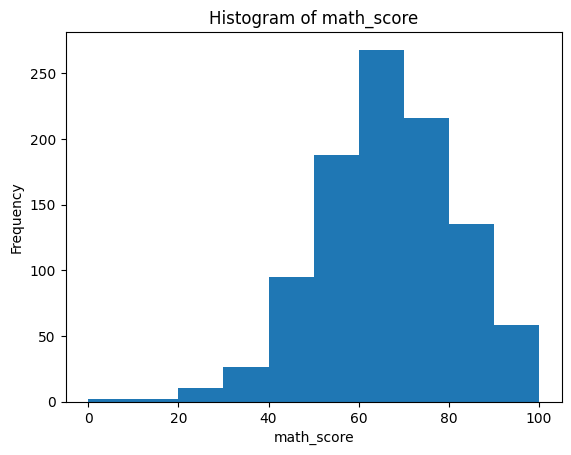

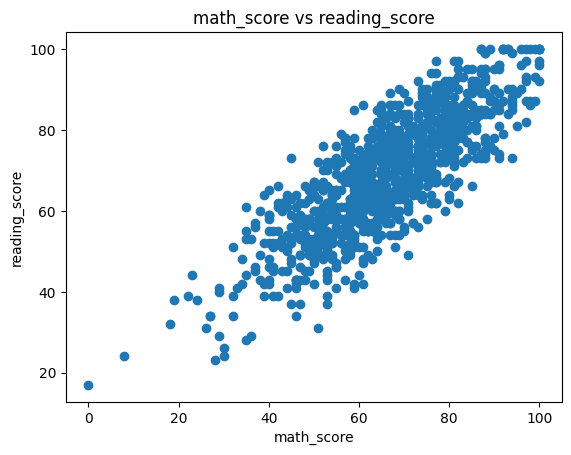

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


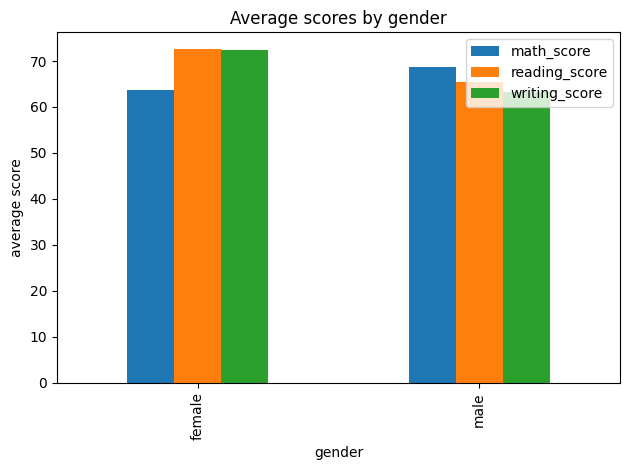

In [ ]:
# Plots (inline): histogram, scatter, average by gender
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# Histogram of math_score
plt.figure()
plt.hist(df['math_score'].dropna(), bins=10)
plt.title('Histogram of math_score')
plt.xlabel('math_score')
plt.ylabel('Frequency')
plt.show()

# Scatter math vs reading
plt.figure()
plt.scatter(df['math_score'], df['reading_score'])
plt.title('math_score vs reading_score')
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.show()

# Bar: average scores by gender
if 'gender' in df.columns:
    avg_by_gender = df.groupby('gender')[score_cols].mean()
    display(avg_by_gender)
    avg_by_gender.plot(kind='bar')
    plt.title('Average scores by gender')
    plt.xlabel('gender')
    plt.ylabel('average score')
    plt.tight_layout()
    plt.show()

In [ ]:
#  Save cleaned CSV, summary and plots, then offer downloads
# Save to /content/outputs in Colab
out_dir = Path('/content/outputs')
plots_dir = out_dir / 'plots'
out_dir.mkdir(parents=True, exist_ok=True)
plots_dir.mkdir(parents=True, exist_ok=True)

# Save cleaned CSV (with pass/fail columns)
cleaned_csv = out_dir / 'students_cleaned.csv'
df.to_csv(cleaned_csv, index=True)   # index kept as student_id
print('Saved cleaned CSV to', cleaned_csv)

# Save aggregated numeric stats summary
agg = df[score_cols].agg(['min','max','sum','mean','count']).transpose().rename(columns={'mean':'average'})
summary_csv = out_dir / 'students_aggregated_summary.csv'
agg.to_csv(summary_csv)
print('Saved numeric aggregate CSV to', summary_csv)

# Save example plots
hist_p = plots_dir / 'hist_math_score.png'
plt.figure(); plt.hist(df['math_score'].dropna(), bins=10); plt.title('Histogram of math_score'); plt.savefig(hist_p, bbox_inches='tight'); plt.close()
scatter_p = plots_dir / 'scatter_math_reading.png'
plt.figure(); plt.scatter(df['math_score'], df['reading_score']); plt.title('math vs reading'); plt.savefig(scatter_p, bbox_inches='tight'); plt.close()
print('Saved plots to', plots_dir)

Saved cleaned CSV to /content/outputs/students_cleaned.csv
Saved numeric aggregate CSV to /content/outputs/students_aggregated_summary.csv
Saved plots to /content/outputs/plots


In [ ]:
#  Download outputs (optional)
from google.colab import files as colab_files
files_to_download = [str(cleaned_csv), str(summary_csv)]
for fpath in files_to_download:
    if os.path.exists(fpath):
        print('Preparing to download', fpath)
        colab_files.download(fpath)

# To download all plots as zip (uncomment to run)
# import shutil
# shutil.make_archive('/content/outputs/plots', 'zip', str(plots_dir))
# colab_files.download('/content/outputs/plots.zip')

print('Notebook cells ready — run them in order in Colab.')

Preparing to download /content/outputs/students_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preparing to download /content/outputs/students_aggregated_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Notebook cells ready — run them in order in Colab.
